In [1]:
import re 

def conv(x): # 1-200 scale to 20-80
    if type(x) is str:
        x = int(x)
    r = x*60.0/200+20 # 0 -> 20, 200 -> 80
    return int(round(r/5)*5)

In [2]:
from datautil.gamelog import simplify_game_logs

def analysis(fn, rating_map):
    evntMap = {}
    for res in simplify_game_logs(fn):
        try:
            pitcher_info = rating_map[res['pitcher']]
            batter_info = rating_map[res['batter']]
        except:
            # fix: dump csv after season is done
            continue

        pitcher_hand = 'r' if pitcher_info['throws'] == 1 else 'l'

        match batter_info['bats']: #switch
            case 1:
                batter_hand = 'l'
            case 2:
                batter_hand = 'r'
            case 3: #switch
                batter_hand = 'l' if pitcher_hand == 'r' else 'r'

        key = (conv(pitcher_info['pitching_ratings_vs' + batter_hand + '_movement']), conv(batter_info['batting_ratings_vs' + pitcher_hand + '_power']))
        evnt,ab = evntMap.get(key, (0,0))
        evnt += 1 if res['result'] == "HR" else 0
        ab += 1 if res['is_ab'] else 0
        evntMap[key] = (evnt,ab)

    return [[evntMap.get((p,b),(0,0)) for b in range(20,85,5)] for p in range(20,85,5)]
            

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example 2D list

def show_heat_map(data_raw):
    # Convert the 2D list to a numpy array
    ct = data_raw[6][6][0]/data_raw[6][6][1]*100
    data = [[t[0]/t[1]*100 if t[1]>50 else 0 for t in row] for row in data_raw]
    data_array = np.array(data)

    # Create the plot
    plt.imshow(data_array, cmap='Greens', vmin=0, vmax=20)
    plt.colorbar()

    plt.xlabel('Batter Power')
    plt.ylabel('Pitcher Mov')
    plt.title('HR/AB')

    # Add labels and title
    ratings = list(range(20,85,5))
    plt.xticks(np.arange(len(ratings)), ratings)
    plt.yticks(np.arange(len(ratings)), ratings)

    for i in range(len(ratings)):
        for j in range(len(ratings)):
            if data_raw[i][j][1] > 50:
                plt.text(j, i, "{:.1f}%\n{}".format(data[i][j],data_raw[i][j][1]), ha='center', va='center', color='black', fontsize=6)

    # Display the plot
    plt.gca().invert_yaxis()
    plt.show()

In [4]:
from datautil.gamelog import load_logs
from datautil.stat_loader import load_player_rating_map

In [5]:
data_collection = []
import time
for t in range(8001, 8016):
    fn = 'test_' + str(t)
    start = time.time()
    data_collection.append(analysis(load_logs(fn), load_player_rating_map(fn)))
    end = time.time()
    print (fn, end-start)

test_8001 13.317511320114136
test_8002 13.379541635513306
test_8003 13.106388092041016
test_8004 15.051673889160156
test_8005 14.5393967628479
test_8006 13.650087594985962
test_8007 14.207454442977905
test_8008 13.84740424156189
test_8009 13.850948095321655
test_8010 14.792487382888794
test_8011 13.306459188461304
test_8012 14.893111228942871
test_8013 14.758485317230225
test_8014 14.177922248840332
test_8015 14.53374695777893


In [6]:
n = len(data_collection[0])
m = len(data_collection[0][0])

agg = [[(sum(map(lambda x: x[u][v][0], data_collection)), sum(map(lambda x: x[u][v][1], data_collection))) for v in range(m)] for u in range(n)]

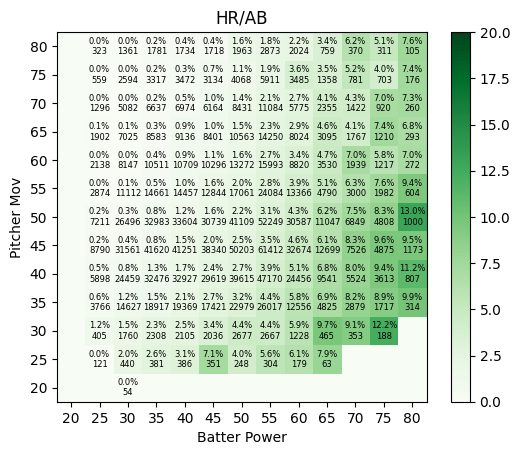

In [7]:
show_heat_map(agg)